In [1]:
%load_ext autoreload
import numpy as np
%aimport FE
%aimport common_meshes
import matplotlib.pyplot as plt
from matplotlib import animation
import triangle
%matplotlib inline
print(plt.style.available)
plt.style.use('seaborn-paper')

['fivethirtyeight', 'bmh', 'ggplot', 'seaborn-ticks', 'seaborn-bright', 'seaborn-white', 'seaborn-deep', 'seaborn-darkgrid', 'classic', 'seaborn-pastel', 'seaborn-talk', 'seaborn-whitegrid', 'seaborn-paper', 'seaborn-dark', 'seaborn-muted', 'seaborn-notebook', 'seaborn-dark-palette', 'dark_background', 'grayscale', 'seaborn-poster', 'seaborn-colorblind']


In [ ]:
"""Example from matplotlib website"""

def update_line(num, data, line):
    line.set_data(data[...,:num])
    return line,

fig1 = plt.figure()

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
    interval=50, blit=True)
line_ani.save('lines.mp4')

fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
    blit=True)
im_ani.save('im.mp4', metadata={'artist':'Guido'})

#plt.show()

In [2]:
def plotMesh(mesh):
    x = mesh['vertices'][:,0]
    y = mesh['vertices'][:,1]
    plt.axes().set_aspect('equal')
    plt.triplot(x, y, mesh['triangles'])
    return

In [58]:
t = np.arange(0., 1., 0.01)
pt_list = np.array([[0.5-x/2.,0.5+x/2.] for x in t])

[ 0.5  0.5]
             time: 0.11187505722045898
[ 0.495  0.505]
             time: 0.11595392227172852
[ 0.49  0.51]
             time: 0.12259793281555176
[ 0.485  0.515]
             time: 0.1254901885986328
[ 0.48  0.52]
             time: 0.11061239242553711
[ 0.475  0.525]
             time: 0.11753249168395996
[ 0.47  0.53]
             time: 0.1535499095916748
[ 0.465  0.535]
             time: 0.14577794075012207
[ 0.46  0.54]
             time: 0.12521719932556152
[ 0.455  0.545]
             time: 0.1360163688659668
[ 0.45  0.55]
             time: 0.1298203468322754
[ 0.445  0.555]
             time: 0.1280078887939453
[ 0.44  0.56]
             time: 0.12572908401489258
[ 0.435  0.565]
             time: 0.12482929229736328
[ 0.43  0.57]
             time: 0.13806414604187012
[ 0.425  0.575]
             time: 0.14125895500183105
[ 0.42  0.58]
             time: 0.12491154670715332
[ 0.415  0.585]
             time: 0.1229856014251709
[ 0.41  0.59]
             time: 0.1

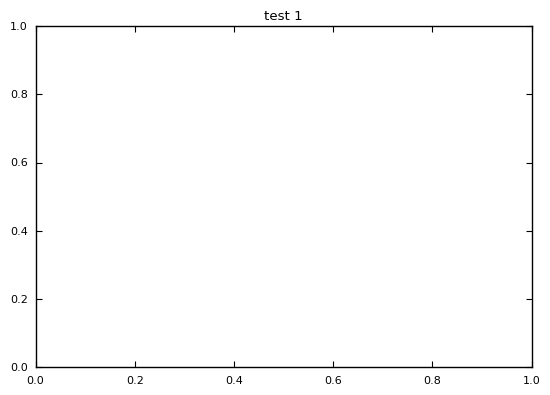

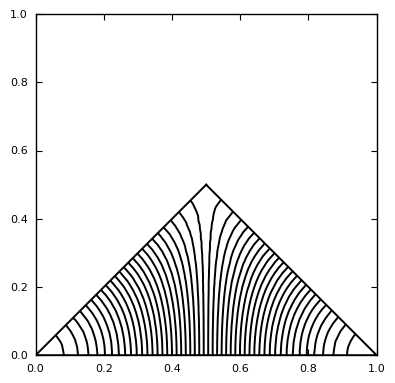

In [59]:
im = []
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('test 1')
fig = plt.figure()
for pt in pt_list:
    print(pt)
    sklt = {'vertices': np.array([[0.,0.], [1.,0.], pt]),
            'triangles': np.array([[0,1,2]]),
            'segments': np.array([[0], [1], [2]])}
    plt.axes().set_aspect('equal')
    sk_x = sklt['vertices'][:,0]
    sk_y = sklt['vertices'][:,1]
    mesh = triangle.triangulate(sklt, 'qa0.0005')
    evecs = FE.findEigs(mesh, 5)[1]
    eigvec_1 = evecs[:,1]
    contours = np.linspace(np.min(eigvec_1)-0.01, np.max(eigvec_1)+0.01, 50)
    #plt.triplot(sk_x, sk_y, color='k')
    x = mesh['vertices'][:,0]
    y = mesh['vertices'][:,1]
    im.append((plt.tricontour(x, y, eigvec_1, contours, 
                             colors=('k',), linestyles='solid').collections +
               plt.triplot(sk_x, sk_y, color='k')))
im_ani = animation.ArtistAnimation(fig, im + im[::-1], interval=33, repeat_delay=10,
                                   blit=True)
im_ani.save('hot_spots_1.mp4', metadata={'artist':'Neal Coleman'})
    